# An attempt to define _diversity_ for names

[Assignment 2](https://github.com/fau-masters-collected-works-cgarbin/cap5768-introduction-to-data-science/tree/master/assignment2) has a question about naming diversity:

> H1: There has been an increase in naming diversity over time.

To answer that question we first need to define how to measure _diversity_.

This notebook is an attempt to create a definition for "naming diversity".

## The dataset

This is the dataset we will use. It's a small dataset to help visualize the results of the different metrics.

In [142]:
import pandas as pd

births = pd.DataFrame([
    {'name': 'Isaac', 'births': 12, 'year': 1970},

    {'name': 'Isaac', 'births': 10, 'year': 1971},
    {'name': 'Albert', 'births': 2, 'year': 1971},

    {'name': 'Isaac', 'births': 8, 'year': 1972},
    {'name': 'Albert', 'births': 2, 'year': 1972},
    {'name': 'Stephen', 'births': 2, 'year': 1972},

    {'name': 'Isaac', 'births': 4, 'year': 1973},
    {'name': 'Albert', 'births': 4, 'year': 1973},
    {'name': 'Stephen', 'births': 4, 'year': 1973}
])
births.set_index('year', inplace=True)
births

,name,births
year,,
1970,Isaac,12
1971,Isaac,10
1971,Albert,2
1972,Isaac,8
1972,Albert,2
1972,Stephen,2
1973,Isaac,4
1973,Albert,4
1973,Stephen,4


## Diversity as "more names"

We will start with a simple definition: diversity means "more names are being used".

In [149]:
births.pivot_table('name', index='year', aggfunc='count')

,name
year,
1970,1
1971,2
1972,3
1973,3


By this definition, _diversity_ is increasing over the years.

But this measurement has a problem: even though more names are being used, until the last year we are more likely to meet an _Isaac_ than any other name.

Although there are more names, they are not being used equally. In that sense, we don't have diversity in the usage of the names.

## Diversity as "more names, used by more people"

By normalizing the names we can measure if they are more evenly distributed in the population.

In [151]:
births.pivot_table('births', index='year', columns='name',
                   aggfunc='sum', fill_value=0) \
    .apply(lambda x: 100 * x / x.sum(), axis=1)

name,Albert,Isaac,Stephen
year,,,
1970,0.000000,100.000000,0.000000
1971,16.666667,83.333333,0.000000
1972,16.666667,66.666667,16.666667
1973,33.333333,33.333333,33.333333


The table shows that even though we are using more names since the third year, it's not until the very last year that _Isaac_ stops dominating the distribution.

With that measurement we now have a better measurement of diversity: more names are being used by more people.

But this measurement has a problem: we have to inspect the table to figure out if names are evenly distributed (or not).

### Simplifying the measurement

To get one number that represents _diversity_ as "more names, used by more people", we will use the standard deviation of the names.

The standard deviation is large when names are concentrated in the population (less name diversity) and it will approach zero when the names are spread out (more name diversity). This gives us one number to represent "more names, used by more peple".

However, we think in terms of "increased diversity". To have a large number when diversity increases (when standard deviation is low), we use the inverse of the standard deviation.

Finally, we have to take care of one special case: when names are perfectly distributed standard deviation is zero. The inverse in that case will result in division by zero. We will manually adjust it to "1", representing the perfect diversity.

In [168]:
usage = births.pivot_table('births', index='year', columns='name',
                           aggfunc='sum', fill_value=0)
usage['diversity'] = 1 / usage.std(axis=1)
usage.replace(np.inf, 1, inplace=True)
usage

name,Albert,Isaac,Stephen,diversity
year,,,,
1970,0,12,0,0.144338
1971,2,10,0,0.188982
1972,2,8,2,0.288675
1973,4,4,4,1.000000


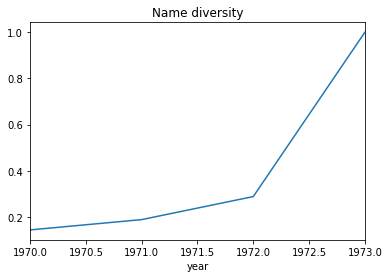

In [176]:
%matplotlib inline
usage['diversity'].plot(title='Name diversity')